# Inspect seasonality in frequency plots

In [41]:
import augur
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys

%matplotlib inline

In [42]:
plt.style.use("huddlej")

In [7]:
data = "../results/builds/h3n2/5_viruses_per_month/sample_0/2005-10-01--2015-10-01/tip_attributes.tsv"

In [14]:
df = pd.read_csv(
    data,
    sep="\t",
    usecols=["timepoint", "frequency", "strain", "clade_membership"],
    parse_dates=["timepoint"]
)

In [18]:
df.head()

,strain,clade_membership,timepoint,frequency
0,A/Argentina/7646/2009,"HA1:50E,HA1:140I,HA1:173Q,HA1:193F,HA1:225N,HA...",2009-10-01,0.000503
1,A/Australia/2/2009,"HA1:50E,HA1:62K,HA1:140I,HA1:144K,HA1:158N,HA1...",2009-10-01,0.000086
2,A/Australia/55/2009,"HA1:50E,HA1:62K,HA1:140I,HA1:144K,HA1:158N,HA1...",2009-10-01,0.000246
3,A/Bangladesh/7772/2009,"HA1:50E,HA1:140I,HA1:158N,HA1:173Q,HA1:189K,HA...",2009-10-01,0.000002
4,A/Brazil/1814/2009,"HA1:50E,HA1:140I,HA1:173Q,HA1:193F,HA1:225N,HA...",2009-10-01,0.000001


In [20]:
clade_df = df.groupby(["timepoint", "clade_membership"])["frequency"].sum().reset_index()

In [21]:
clade_df.head()

,timepoint,clade_membership,frequency
0,2009-10-01,"HA1:3F,HA1:50E,HA1:140I,HA1:193F,HA1:225N,HA2:...",0.000297
1,2009-10-01,"HA1:50E,HA1:140I,HA1:158N,HA1:173Q,HA1:189K,HA...",0.383789
2,2009-10-01,"HA1:50E,HA1:140I,HA1:158R,HA1:173Q,HA1:193F,HA...",0.041809
3,2009-10-01,"HA1:50E,HA1:140I,HA1:173Q,HA1:193F,HA1:225N,HA...",0.033889
4,2009-10-01,"HA1:50E,HA1:62K,HA1:140I,HA1:144K,HA1:158N,HA1...",0.329322


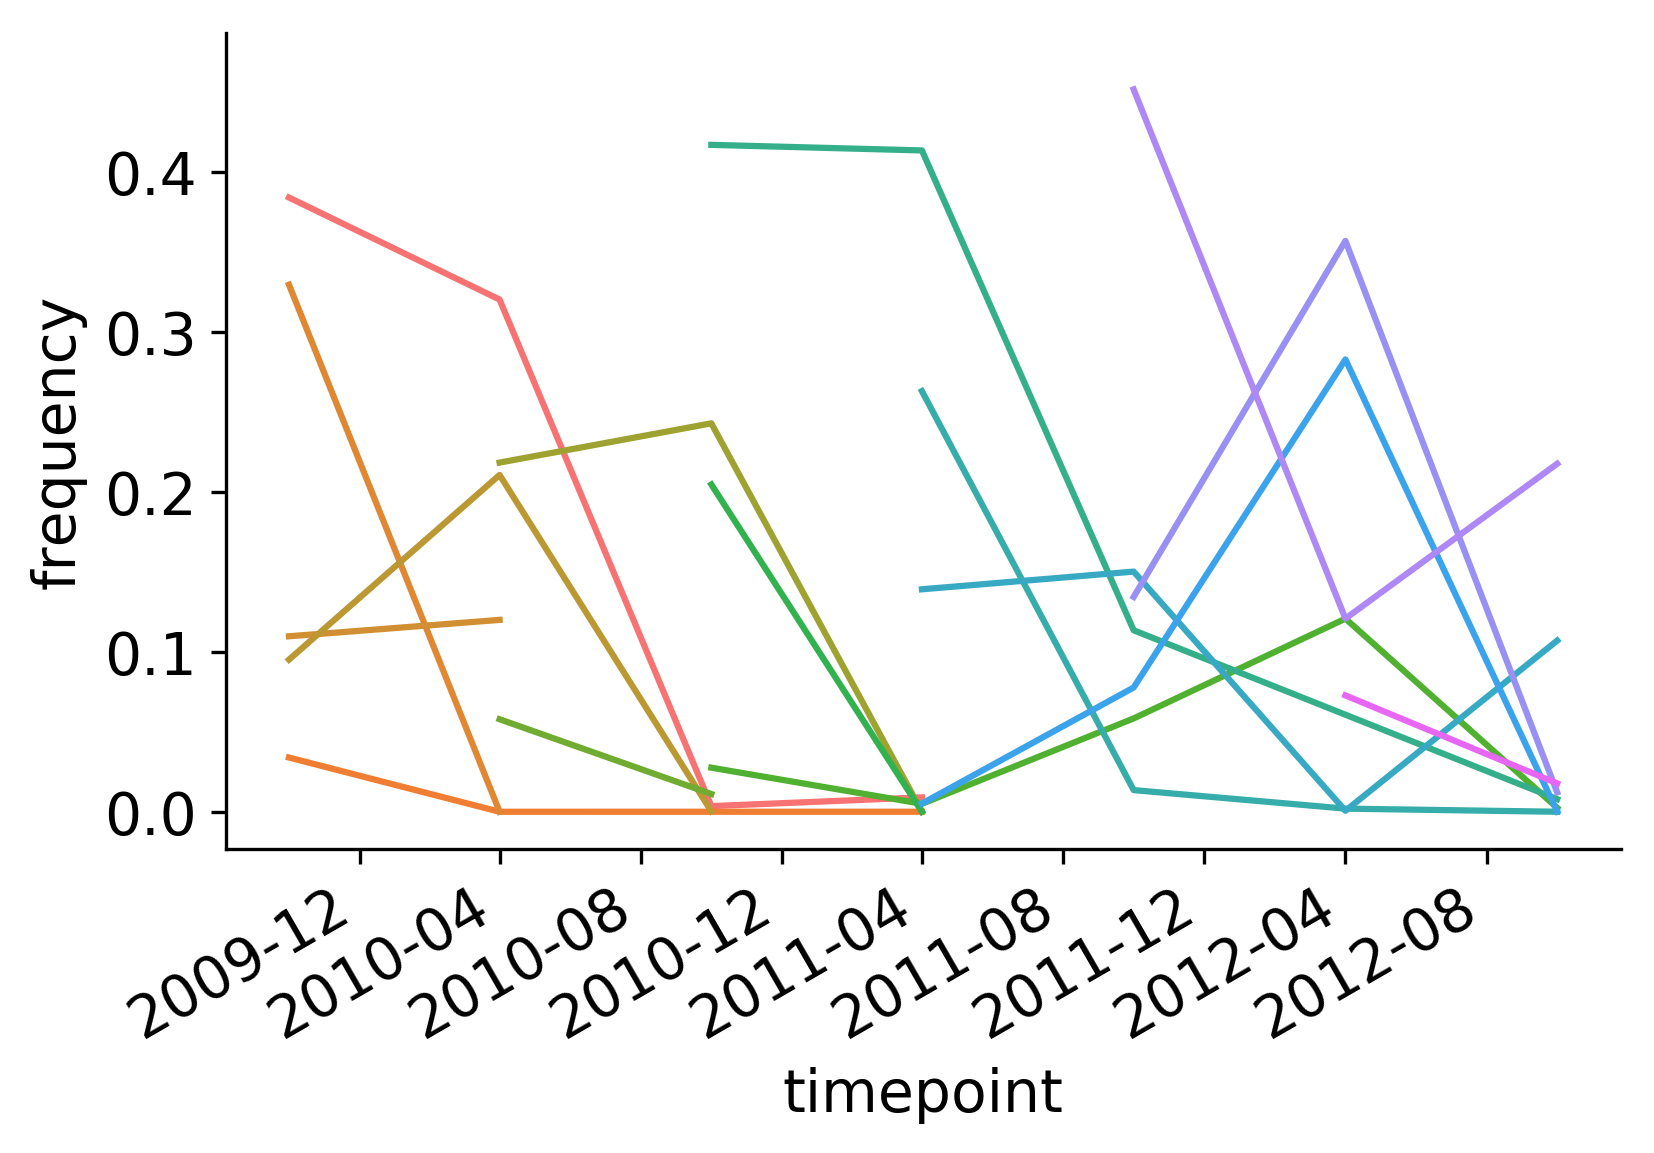

In [46]:
ax = sns.lineplot("timepoint", "frequency", hue="clade_membership", data=clade_df, legend=False)
plt.gcf().autofmt_xdate()